In [24]:
#import the library
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 

In [25]:
dataset = read_csv('diabetes.csv')
print(dataset.describe())


       pregenancy      plasma  blood pressure  Triceps thickness  \
count  768.000000  768.000000      768.000000         768.000000   
mean     3.845052  120.894531       69.105469          20.536458   
std      3.369578   31.972618       19.355807          15.952218   
min      0.000000    0.000000        0.000000           0.000000   
25%      1.000000   99.000000       62.000000           0.000000   
50%      3.000000  117.000000       72.000000          23.000000   
75%      6.000000  140.250000       80.000000          32.000000   
max     17.000000  199.000000      122.000000          99.000000   

       serum insulin         BMI  pedigree function         Age   ethnicity  \
count     768.000000  768.000000         768.000000  768.000000  768.000000   
mean       79.799479   31.992578           0.471876   33.240885    1.000000   
std       115.244002    7.884160           0.331329   11.760232    0.810621   
min         0.000000    0.000000           0.078000   21.000000    0.00

In [26]:
dataset

,pregenancy,plasma,blood pressure,Triceps thickness,serum insulin,BMI,pedigree function,Age,ethnicity,Class
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,1,0
2,8,183,64,0,0,23.3,0.672,32,0,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1,0
764,2,122,70,27,0,36.8,0.340,27,2,0
765,5,121,72,23,112,26.2,0.245,30,2,0
766,1,126,60,0,0,30.1,0.349,47,1,1


In [27]:
######  mark missing data

#replace missing data with NaN
zero_not_accepted=['plasma','blood pressure','Triceps thickness','serum insulin','BMI']
for column in zero_not_accepted:
    print(column,(dataset[column] == 0).sum()) #amount of data with 0
    dataset[column] = dataset[column].replace(0, np.NaN) #replace data with nan


print(dataset.describe())

plasma 5
blood pressure 35
Triceps thickness 227
serum insulin 374
BMI 11
       pregenancy      plasma  blood pressure  Triceps thickness  \
count  768.000000  763.000000      733.000000         541.000000   
mean     3.845052  121.686763       72.405184          29.153420   
std      3.369578   30.535641       12.382158          10.476982   
min      0.000000   44.000000       24.000000           7.000000   
25%      1.000000   99.000000       64.000000          22.000000   
50%      3.000000  117.000000       72.000000          29.000000   
75%      6.000000  141.000000       80.000000          36.000000   
max     17.000000  199.000000      122.000000          99.000000   

       serum insulin         BMI  pedigree function         Age   ethnicity  \
count     394.000000  757.000000         768.000000  768.000000  768.000000   
mean      155.548223   32.457464           0.471876   33.240885    1.000000   
std       118.775855    6.924988           0.331329   11.760232    0.810621 

In [33]:
#ToDo:
#split to data and target
X=dataset.iloc[:,:9] # features
y=dataset.iloc[:,9] # class
#print(X)
#print(y)
#split between test and train.
# split 2/3 and 1/3 with random state of 1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)
# use Imputer to deal with missing values
imputer = SimpleImputer(missing_values=np.NaN,strategy='mean').fit(X_train)
imputer = imputer.fit(X_train) # only do fit on train
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
# use OneHotEncode for categorial data to catogrize 'ethenticity'
X["ethnicity"] = X["ethnicity"].astype('category')
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(X[["ethnicity"]]).toarray())
X = X.join(enc_df)
#normilize values
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
# balance the data
'''
balance the data
X_train['pregenancy'] *= 8
X_test['pregenancy'] *= 8
X_train['pedigree function'] *= 70
X_test['pedigree function'] *= 70
X_train['Triceps thickness']  *= 2
X_test['Triceps thickness'] *= 2
X_train['BMI'] *= 2
X_test['BMI'] *= 2
X_train['Age'] *= 1.5
X_test['Age'] *= 1.5
'''


[[-0.81728943 -0.46676002 -0.96888366 ... -0.16623204 -0.77644055
   0.04583586]
 [ 2.80154846 -0.53313386 -0.19047246 ... -0.65838911  1.55061742
  -1.19414473]
 [ 0.08742005 -0.33401236  0.43225651 ... -0.70340348  0.38708844
  -1.19414473]
 ...
 [ 2.80154846  0.13060448  1.36634995 ...  0.33792886  0.71952529
  -1.19414473]
 [ 0.08742005  1.62401574 -0.03479021 ...  0.02582926 -0.61022212
  -1.19414473]
 [ 1.59526917 -0.66588152  0.27657427 ...  0.5840074   1.05196214
   0.04583586]]


"\nbalance the data\nX_train['pregenancy'] *= 8\nX_test['pregenancy'] *= 8\nX_train['pedigree function'] *= 70\nX_test['pedigree function'] *= 70\nX_train['Triceps thickness']  *= 2\nX_test['Triceps thickness'] *= 2\nX_train['BMI'] *= 2\nX_test['BMI'] *= 2\nX_train['Age'] *= 1.5\nX_test['Age'] *= 1.5\n"

0.7519685039370079

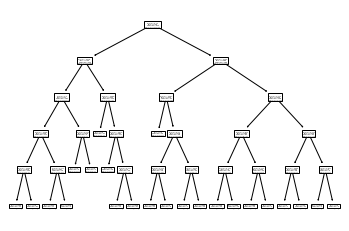

In [34]:
# write a classifier named clf as decision tree
# use 3 depth trees {3,5,10} and find the best result
# use the next box to see the tree as a pdf
# which is of them is better and why?

# After running copule of tests with diffrent seeds, I found
# that most of the times the depth with the height score was 5, therefore
# I think depth 5 is the better out of them.
# Depth of 10 is bad in my opinion because the tree make his decisions 
# based on a lot of irregulars
# Depth of 3 is ok, but not the best because I think there is room to improve the decisions.
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
tree.plot_tree(clf)
clf.score(X_test,y_test)

In [37]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=pd.DataFrame(X_train).columns, filled=True, rounded=True, class_names=['sick','healthy'] )
graph = graphviz.Source(dot_data)
graph.render("tree"+str(5))

'tree5.pdf'